House Prices Kaggle Notebook

In [21]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.ensemble import GradientBoostingRegressor as gBR
import time
from sklearn import metrics

In [22]:
train_csv = csv.reader(open('train.csv','rt'), delimiter=',')
train_data = list()

for data in train_csv:
    train_data.append(data)

length = len(train_data)
sale_prices = list()

for i in range(1, length):
    sale_prices.append(int(train_data[i][80]))

X = sale_prices
Y = list(i for i in range(0, len(sale_prices)))

Plotting the raw sale price data

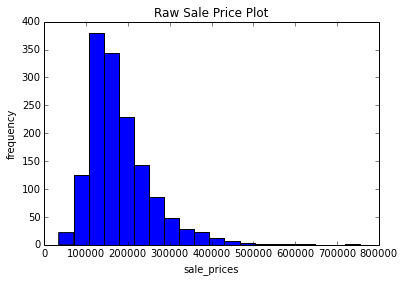

In [23]:
plt.hist(X, bins=20)
plt.xlabel("sale_prices")
plt.ylabel("frequency")
plt.title("Raw Sale Price Plot")
plt.show()

Plotting the normalized sale price data

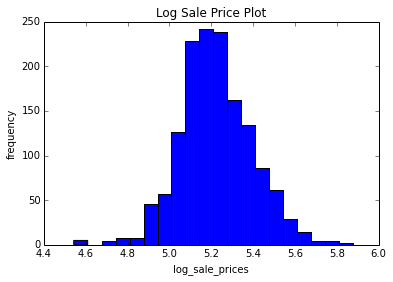

In [24]:
log_sale_prices = list()
for price in sale_prices:
    log_sale_prices.append(math.log10(price))

plt.hist(log_sale_prices, bins=20)
plt.xlabel("log_sale_prices")
plt.ylabel("frequency")
plt.title("Log Sale Price Plot")
plt.show()

Training the Gradient Boost Regressor on training data and predicting on testing data.

In [27]:
start_time = time.time()

train_df = pd.read_csv('train.csv')
train_df_dict = dict()

length = len(train_df)

for i in range(length):
     train_df_dict[train_df.loc[i, 'Id']] = train_df.loc[i, 'SalePrice']
     train_df.loc[i, 'SalePrice'] = math.log10(float(train_df.loc[i, 'SalePrice']))

Encoding the categorical attributes.

In [28]:
col = list(c for c in train_df.columns)
col = col[1: len(col) - 1]

for i in col:
     train_df.loc[:, i] = train_df.loc[:, i].astype('category')

categorical_columns = train_df.select_dtypes(['category']).columns
train_df[categorical_columns] = train_df[categorical_columns].apply(lambda x: x.cat.codes)

Sampling the training data

In [29]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

train_df_vector = train_df.iloc[:, 1: len(col)]
train_df_target = train_df.iloc[:, len(col) + 1]

Reading the test.csv file for vectors and encoding the categorical attributes

In [30]:
test_df = pd.read_csv('test.csv')
test_data_ids = list(test_df['Id'])

col = list(c for c in test_df.columns)
col = col[1:]

for i in col:
     test_df.loc[:, i] = test_df.loc[:, i].astype('category')

categorical_columns = test_df.select_dtypes(['category']).columns
test_df[categorical_columns] = test_df[categorical_columns].apply(lambda x: x.cat.codes)

test_df_vector = test_df.iloc[:, 1: len(col)]

Testing and predicting on the test data

In [31]:
reg = gBR(loss='ls', n_estimators=10000)
reg = reg.fit(train_df_vector, train_df_target)

lr_predict = reg.predict(test_df_vector)
print("Time for the regressor to train and predict on the testing data subset is := %.2f" % (time.time() - start_time))

Time for the regressor to train and predict on the testing data subset is := 28.37


Writing the results to a csv file

In [32]:
csv_file = open("submissions.csv", 'w')
wr = csv.writer(csv_file, delimiter=',', quoting=csv.QUOTE_NONE)
wr.writerow(['Id', 'SalePrice'])

for index in range(0, len(test_data_ids)):
    wr.writerow([test_data_ids[index], math.pow(10, lr_predict[index])])
    index += 1
print("Done with predicting Sale Price values for the test data")
csv_file.close()

Done with predicting Sale Price values for the test data
